In [28]:
import joblib
diabites_gs = joblib.load("./cache/diabetes_gs.pkl")
heart_gs = joblib.load("./cache/heart_attack.pkl")
tweets_gs = joblib.load("./cache/tweets2.pkl")

In [6]:
heart_gs.best_score_

0.8500757612200545

In [29]:
tweets_gs.best_score_

0.6189128249973106

In [30]:
import pandas as pd
results = []
for gs in [diabites_gs, heart_gs, tweets_gs]:
    results.append( pd.DataFrame({
        "model": [
            gs.cv_results_['param_clf'][i].__str__()[:-2]
            for i in range(len(gs.cv_results_['param_clf']))
        ],
        "CV5_mean_f1": gs.cv_results_['mean_test_f1']
    }))

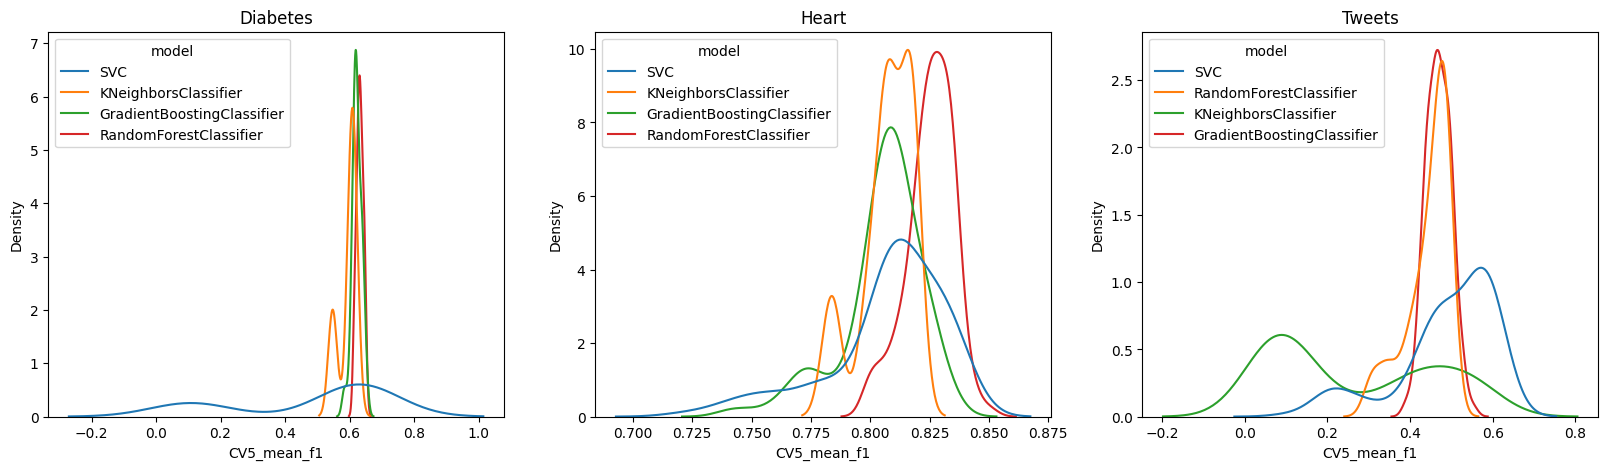

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

f, axs = plt.subplots(1, 3, figsize=(20, 5))
axs = axs.ravel()
for ax, data, title in zip(axs, results, ["Diabetes", "Heart", "Tweets"]):
    sns.kdeplot(data, hue="model", x="CV5_mean_f1", ax=ax)
    ax.set_title(title)

In [33]:
tweets_gs.best_estimator_

Pipeline(steps=[('ts',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   MinMaxScaler())]),
                                                  []),
                                                 ('cat',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  []),
                                                 ('text',
                                                  Pipeline(steps=[('tfidf',
                                                                   TfidfVectorizer(dtype='float32',
                                                                                   max_features=20000,
                                                                                   stop_words='english'))]),
                                                  'text')])),
                ('clf', SVC(C=4.7442091272620175))])